In [21]:
import numpy as np
import matplotlib.pyplot as plt
from bloch_schrodinger.potential import Potential, create_parameter
from bloch_schrodinger.fdsolver import FDSolver
from bloch_schrodinger.plotting import plot_eigenvector, plot_cuts

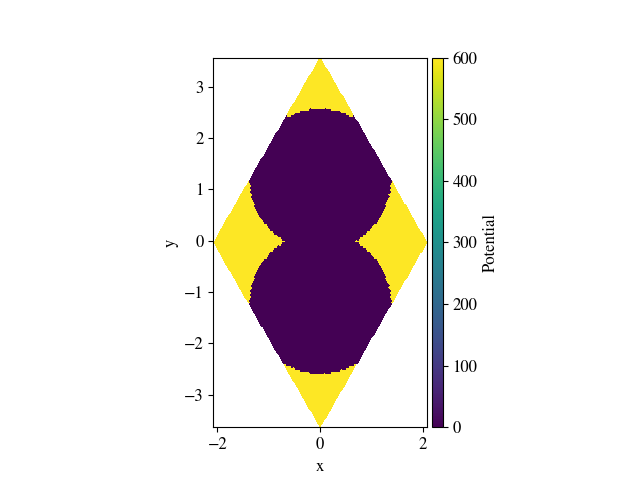

In [22]:
%matplotlib widget

a = 2.4 # Inter pillar distance
dr = create_parameter('dr', np.linspace(0,0.1,2))
rA = 2.75/2 + dr
rB = 2.75/2 - dr

a1 = np.array([-3**0.5/2 * a, 3/2 * a]) # 1st lattice vector
a2 = np.array([ 3**0.5/2 * a, 3/2 * a]) # 2nd lattice vector

Honey = Potential([a1,a2], (100,100), v0 = 600)

posA = np.array([0,a/2])
posB = np.array([0,-a/2])
ucs = [(0,0),(0,1),(0,-1),(-1,0),(1,0)]
for uc in ucs:
    centerA = posA + a1*uc[0] + a2*uc[1]
    centerB = posB + a1*uc[0] + a2*uc[1]
    Honey.circle(centerA, rA, value = 0)
    Honey.circle(centerB, rB, value = 0)
    
Honey.plot()
plt.show()

In [23]:
alpha = 1
beta = create_parameter('beta', np.linspace(0, 0.01, 2))
delta = create_parameter('delta', np.linspace(0, 0.1, 2))
# Let's take phi0 = 0 to reduce the parameter space

solv = FDSolver(
    potentials = [Honey, Honey], # We have two fields, each seing the same potential
    alphas = [alpha, alpha] # In the circular basis, both polarizations have the same mass term
)

# --- Adding coupling terms ---
# The TE/TM splittings and local coupling terms can be set with dedicated high level functions, 
# but it is also possible to use the lower level functions to set a coupling term, see the dedicated tutorial

solv.add_coupling_parameter('beta', beta) # The coupling parameters must be added by hand
solv.add_coupling_parameter('delta', delta) # The coupling parameters must be added by hand

solv.add_TETM(
    expr='beta', # The expression for the strength of the coupling term, is given as a string to be evaluated latter
    field1 = 0, # We need to tell which fields are the photonic ones, in case there is more than 2 fields
    field2 = 1
)

solv.add_on_site_coupling( # This function creates a local coupling term between fields
    expr='delta',
    field1 = 0,
    field2 = 1
)


# Some important reciprocal vectors
K = np.array([4*np.pi/3**1.5/a, 0])
a1s = np.array([3**0.5, -1])*2*np.pi/3/a
a2s = np.array([3**0.5,  1])*2*np.pi/3/a
pad = 0.2
#Let's creat a grid going through the high-symmetry points
M_to_Kp = np.linspace(-a1s[0],-K[0]-pad,5, endpoint=False)
Kp_to_Kp = np.linspace(-K[0]-pad,-K[0]+pad,20, endpoint=False)

Kp_to_K = np.linspace(-K[0]+pad, K[0]-pad, 10, endpoint=False)
K_to_K = np.linspace(K[0]-pad,K[0]+pad,20, endpoint=False)
K_to_M = np.linspace(K[0]+pad, a1s[0], 5)
kxs = np.concatenate([M_to_Kp, Kp_to_Kp,Kp_to_K, K_to_K,K_to_M])

solv.create_reciprocal_grid(
    kx = kxs,
    ky = 0,
)

eigva, eigve = solv.solve(
    n_eigva=4,
    parallel=True
)

Performing the diagonalization...


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 tasks      | elapsed:   56.5s
[Parallel(n_jobs=-1)]: Done 122 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 248 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 410 tasks      | elapsed: 10.4min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed: 12.1min finished


storing the results


100%|██████████| 480/480 [00:01<00:00, 427.05it/s]


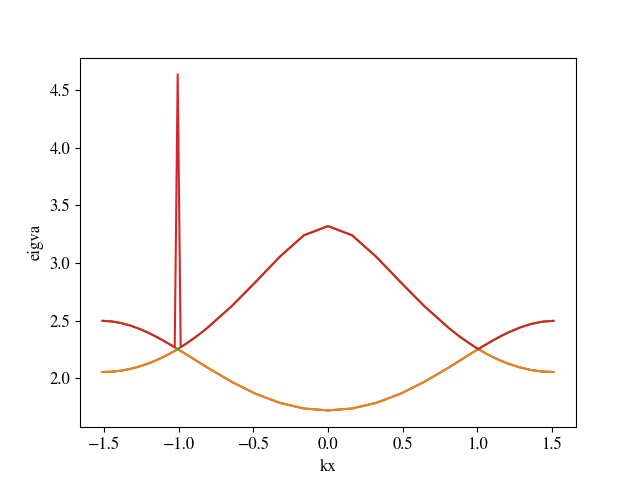

In [24]:
plot_cuts(eigva, 'kx')
plt.show()